In [ ]:
# 0 - fake
# 1 - real

In [89]:
# read dataset
import pandas as pd
data = pd.read_csv('/Users/ellen/OneDrive/Documents/Python/archive/WELFake_Dataset.csv')
data.head() #show columns

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [90]:
data.describe()

,Unnamed: 0,label
count,72134.000000,72134.000000
mean,36066.500000,0.514404
std,20823.436496,0.499796
min,0.000000,0.000000
25%,18033.250000,0.000000
50%,36066.500000,1.000000
75%,54099.750000,1.000000
max,72133.000000,1.000000


In [91]:
data.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [92]:
data = data.dropna()
print("Original DataFrame shape:", data.shape)
print("New DataFrame shape:", data.shape)
data.isnull().sum()

Original DataFrame shape: (71537, 4)
New DataFrame shape: (71537, 4)


Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [93]:
data.label.value_counts()

label
1    36509
0    35028
Name: count, dtype: int64

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [95]:
# Combining title and text
data['content'] = data['title'] + ' ' + data['text']

# Drop rows with missing values
data.dropna(inplace=True)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(data['content'], data['label'], test_size=0.2, random_state=42)

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Assuming X_train is a column of text data
t_vectorizer = TfidfVectorizer()
X_train_tfidf = t_vectorizer.fit_transform(X_train)

model = LogisticRegression(solver='saga', max_iter=3000)

# Create a pipeline with explicit steps
pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('logreg', model)])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('logreg', LogisticRegression(max_iter=3000, solver='saga'))])

In [98]:
# Access the TfidfVectorizer from the pipeline
tfidf_vectorizer = pipeline.named_steps['tfidf']

# Transform the test data using the trained vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Predict using the logistic regression model
predicted = pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predicted))
accuracy = accuracy_score(y_test, predicted)
print("Accuracy:", round(accuracy * 100), '%')
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      7081
           1       0.95      0.96      0.95      7227

    accuracy                           0.95     14308
   macro avg       0.95      0.95      0.95     14308
weighted avg       0.95      0.95      0.95     14308

Accuracy: 95 %
Accuracy: 0.9517752306402013


In [99]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [100]:
cm = metrics.confusion_matrix(y_test, predicted)
print(cm)

[[6691  390]
 [ 300 6927]]


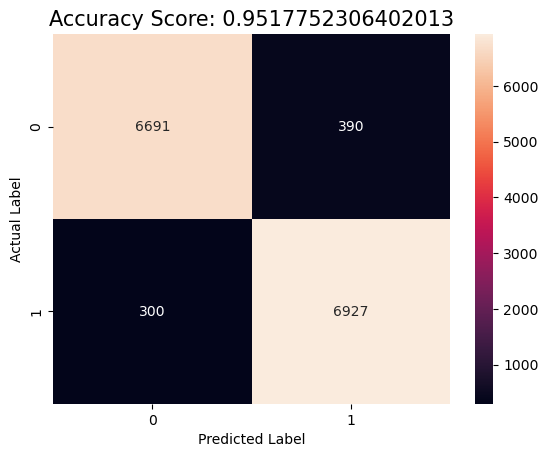

In [101]:
cm = confusion_matrix(y_test, predicted)
sns.heatmap(cm, annot = True, fmt = '')
plt.ylabel('Actual Label');
plt.xlabel('Predicted Label');
# plt.title('Confusion Matrix')
all_sample_title  = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);
plt.show()

In [102]:
def predict_fake_news(news):
    prediction = model.predict(tfidf_vectorizer.transform([news]))  # This is a 2D array

    return 'Fake' if prediction[0] == 0 else 'Real'

# Example usage
example_news = "SATAN 2: Russia unveils an image of its terrifying new nuclear missile"
predicted_label = predict_fake_news(example_news)
print(predicted_label)

Real


In [103]:
print(predict_fake_news("A solar flare could leave the world without internet in 2024"))

Real


In [104]:
print(predict_fake_news("Trump tussle gives unpopular Mexican leader much-needed shot in arm"))

Real


In [105]:
print(predict_fake_news("Satellite imagery shows more than 500 bomb craters in Gaza"))

Real


In [106]:
print(predict_fake_news("Trump urged Michigan officials not to certify 2020 vote"))

Real


In [107]:
print(predict_fake_news("India won the fifa worldcup."))

Real


In [108]:
print(predict_fake_news("Trump to nominate former NASA chief Griffin for defense undersecretary"))

Real


In [109]:
print(predict_fake_news("WASHINGTON (Reuters) - U.S. President Donald Trump intends to nominate Michael Griffin, a former administrator of the National Aeronautics and Space Administration (NASA), as undersecretary of defense for research and engineering, the White House said on Monday. The White House had said in October that Trump intended to tap Griffin for principal deputy undersecretary of defense for acquisition, technology, and logistics. Mondayâ€™s announcement did not give a reason for the change. Griffin most recently served as chairman and chief executive officer of the Schafer Corporation, a provider of scientific, engineering, and technical services and products in the national security sector, the White House said. He held the top NASA job from 2005 to 2009. "))

Fake


In [110]:
print(predict_fake_news("Donate Remember This When You Talk About Standing Rock Dan Nanamkin during the treaty campâ€™s confrontation with militarized police force on Thursday afternoon. Photo by Adam Alexander Johansson. By Kelly Hayes / yesmagazine.org \
This piece is very personal because, as an Indigenous woman, my analysis is very personal, as is the analysis that my friends on the frontlines have shared with me. We obviously canâ€™t speak for everyone involved, as Native beliefs and perspectives are as diverse as the convictions of any people. But as my friends hold strong on the frontlines of Standing Rock, and I watch transfixed with both pride and worry, we feel the need to say a few things. \
Iâ€™ve been in and out of communication with my friends at Standing Rock all day. As you might imagine, as much as they donâ€™t want me to worry, itâ€™s pretty hard for them to stay in touch. I asked if there was anything they wanted me to convey on social media, as most of them are maintaining a very limited presence on such platforms. The following is my best effort to summarize what they had to say, and to chime in with a few corresponding thoughts of my own. \
It is crucial that people recognize that Standing Rock is part of an ongoing struggle against colonial violence. #NoDAPL is a front of struggle in a long-erased war against Native peoples â€” a war that has been active since first contact, and waged without interruption. Our efforts to survive the conditions of this anti-Native society have gone largely unnoticed because white supremacy is the law of the land, and because we, as Native people, have been pushed beyond the limits of public consciousness. \
The fact that we are more likely to be killed by law enforcement than any other group speaks to the fact that Native erasure is ubiquitous, both culturally and literally, but pushed from public view. Our struggles intersect with numerous others, but are perpetrated with different motives and intentions. Anti-Blackness, for example, is a performative enforcement of structural power, whereas the violence against us is a matter of pragmatism. The struggle at Standing Rock is an effort to prevent the construction of a deadly, destructive mechanism, created by greed-driven people with no regard for our lives. It has always been this way. We die, and have died, for the sake of expansion and white wealth, and for the maintenance of both. \
The harms committed against us have long been relegated to the history books. This erasure has occurred for the sake of both white supremacy and US mythology, such as American exceptionalism. It has also been perpetuated to sustain the comfort of those who benefit from harms committed against us. Our struggles have been kept both out of sight and out of mind â€” easily forgotten by those who arenâ€™t directly impacted. \
It should be clear to everyone that we are not simply here in those rare moments when others bear witness. \
To reiterate (what should be obvious): We are not simply here when you see us. \
We have always been here, fighting for our lives, surviving colonization, and that reality is rarely acknowledged. Even people who believe in freedom frequently overlook our issues, as well as the intersections of their issues with our own. It matters that more of the world is bearing witness in this historic moment, but we feel the need to point out that the dialogue around #NoDAPL has become extremely climate oriented. Yes, there is an undeniable connectivity between this front of struggle and the larger fight to combat climate change. We fully recognize that all of humanity is at risk of extinction, whether they realize it or not. But intersectionality does not mean focusing exclusively on the intersections of our respective work. \
It sometimes means taking a journey well outside the bounds of those intersections. \
In discussing #NoDAPL, too few people have started from a place of naming that we have a right to defend our water and our lives, simply because we have a natural right to defend ourselves and our communities. When â€œclimate justiceâ€, in a very broad sense, becomes the center of conversation, our fronts of struggle are often reduced to a staging ground for the messaging of NGOs. \
This is happening far too frequently in public discussion of #NoDAPL. \
Yes, everyone should be talking about climate change, but you should also be talking about the fact that Native communities deserve to survive, because our lives are worth defending in their own right â€” not simply because â€œthis affects us all.â€ \
So when you talk about Standing Rock, please begin by acknowledging that this pipeline was redirected from an area where it was most likely to impact white people. And please remind people that our people are struggling to survive the violence of colonization on many fronts, and that people shouldnâ€™t simply engage with or retweet such stories when they see a concrete connection to their own issues â€” or a jumping off point to discuss their own issues. Our friends, allies and accomplices should be fighting alongside us because they value our humanity and right to live, in addition to whatever else they believe in. \
Every Native at Standing Rock â€” every Native on this continent â€” has survived the genocide of a hundred million of our people. That means that every Indigenous child born is a victory against colonialism, but we are all born into a fight for our very existence. We need that to be named and centered, which is a courtesy we are rarely afforded. \
This message is not a condemnation. Itâ€™s an ask. \
We are asking that you help ensure that dialogue around this issue begins with and centers a discussion of anti-Native violence and policies, no matter what other connections you might ultimately make, because those discussions simply donâ€™t happen in this country. There obviously arenâ€™t enough people talking about climate change, but there are even fewer people â€” and letâ€™s be real, far fewer people â€” discussing the various forms of violence we are up against, and acting in solidarity with us. And while such discussions have always been deserved, we are living in a moment when Native water protectors and water warriors have more than earned both acknowledgement and solidarity. \
So if you have been with us in this fight, we appreciate you. But we are reaching out, right now, in these brave days for our people, and asking that you keep the aforementioned truths front and center as you discuss this effort. This moment is, first and foremost, about Native liberation, self determination and Native survival. That needs to be centered and celebrated. \
Thanks, \
K and friends \
Kelly Hayes is a direct action trainer and a co-founder of The Chicago Light Brigade and the direct action collective Lifted Voices. She blogs at TransformativeSpaces.org , where this article originally appeared, about U.S. movements and her work as an organizer against state violence. 4.0 Â·"))

Real
